# 1. The Determinant
Recall that when we discussed linear transformations, some will stretch space out, while others squish it on in:

<img src="images/determinant-stretch.png" width="300">

<img src="images/determinant-squish.png" width="300">

One thing that turns out to be pretty useful when it comes to these transformations, it to measure exactly _how much_ it stretches or squishes things. More specifically, to measure the factor by which a given area increases or decreases:

<img src="images/det-area-1.png" width="300">
<img src="images/det-area-2.png" width="300">

For example look at the matrix below; it scales $\hat{i}$ by a factor of 3, and $\hat{j}$ by a factor of 2:

<img src="images/det-area-4.png" width="300">
<img src="images/det-area-3.png" width="300">

Now, if we focus our attention on the 1x1 square who's bottom sits on $\hat{i}$ and whose left side sits on $\hat{j}$:

<img src="images/det-area-5.png" width="300">

After the transformation, this turns into a 2x3 rectangle:

<img src="images/det-area-6.png" width="300">

Since this region started out with an area of 1, and ended up with an area of 6, we can say the linear transformation has _scaled its area_ by a factor of 6. Compare that to a shear whose matrix has the form:

$$
\begin{bmatrix}
    1  & 1\\
    0  & 1
\end{bmatrix}$$<br>

In this case the original area, contained by the square of the two unit vectors, is slanted; yet its area does not change: 

<img src="images/det-area-7.png" width="300">
<img src="images/det-area-8.png" width="300">

This brings up to a **key point**:
> If you know how a single unit square's area changes, you can determine how the area of any possible region in space changes. 

For starters, whatever happens to one square in the grid, has to happen to any other square in the grid, no matter the size (this follows from the fact that grid lines must remain parallel and evenly spaced):

<img src="images/det-area-9.png" width="300">
<img src="images/det-area-10.png" width="300">

## 1.1 Determinant Definition
Now this very special scaling factor-the factor by which a linear transformation changes any area-is called the _**determinant**_ of a transformation. So, in the case of our earlier example:

$$det\Big(
\begin{bmatrix}
    3  & 2\\
    0  & 2
\end{bmatrix}\Big) = 6$$<br>

Now, the _determinant_ of a transformation would be 3, if that transformation increases the area of a region by a factor of 3. It would be 1/2 if it squishes down all areas by a factor of 1/2. Finally, the determinant of a transformation is zero if it squishes all of space onto a line! Note, this will be relevant when we discuss eigenvectors. It means that checking if the determinant of a given matrix is zero will give a way of computing whether or not the transformation associated with that matrix squishes everything into a smaller dimension. 

We should also quickly mention that a determinant can be _negative_. This means that space has been inverted (visually we can think of it as being flipped). A simple way to check if this has happened is to note that $\hat{j}$ always starts to the left of $\hat{i}$. If, after a transformation, $\hat{i}$ is to the left of $\hat{j}$ then we know orientation has changed. The absolute value of the determinant will still tell us the factor by which the area has been scaled. 

You may (reasonably) ask, why does this negative area relate to orientation flipping? That is most easily explained with a beautiful visual, seen [here](https://youtu.be/Ip3X9LOh2dk?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&t=306).

## 1.2 Determinant Computation
You may still be wondering at this point, how we actually compute the determinant? While the actual computation is not nearly as important as the underlying meaning and what it represents, it is still useful to cover. We will define the computation as follows:

$$det\Big(
\begin{bmatrix}
    a  & b\\
    c  & d
\end{bmatrix}\Big) = ad - bc$$<br>

---

# 2. Linear Systems of Equations & Inverse Matrices
Now one of the reasons that linear algebra is more broadly applicable, and is required for nearly all technical disciplines, is that it lets us solve certain _systems of equations_. Before digging into a few key points concerning systems of equations, let's look an example:

$$2x + 5y + 3z = -3$$<br>
$$4x + 0y + 8z = 0$$<br>
$$1x + 3y + 0z = 2$$<br>

In this case we have two main entities: 
> 1. **A list of variables, which are unknown**.
2. **A list equations that relate these unknown variables.**

Now, there is a key point that is often glanced over, but it is crucial to keep in mind:
> A System of equations is meant to be treated as an entire _system_. It represents a given _situation_ or _scenario_ in which _all_ of the equations apply. These equations are meant to help define the current state of the world if you will, and in the current state of the world, these equations _all hold true_. This property of all equations in our system holding true means that there must be some set of unique values of the variables involved that make all equations in the system true at the same time. 

We can say this yet one final way:
> We are in a situation/scenario where all equations above hold for a certain $x, y$ and $z$. In order for them to all hold (since we are treating them as a system), we must find the $x, y$ and $z$ where they _intersect_!

## 2.1 Geometric Coordinate Space
Before digging into the linear algebra solution, it is important to have a good understanding of what is happening in _coordinate space_. Let's say we are dealing with the following system of equations:

$$2x + 2y = -4$$<br>
$$1x + 3y = -1$$<br>

What this means is that our world is at a current state where both of these equations hold true! We can quickly plot the equations below:

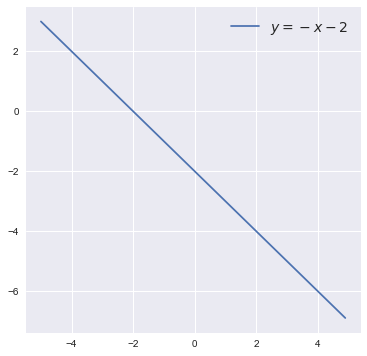

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,6))
x = np.arange(-5, 5, 0.1)
y1 = (-2*x - 4) / 2
y2 = (-1*x - 1) / 3 
plt.plot(x, y1)
ax.legend([r'$y = -x - 2$'], fontsize=14, ncol=2)

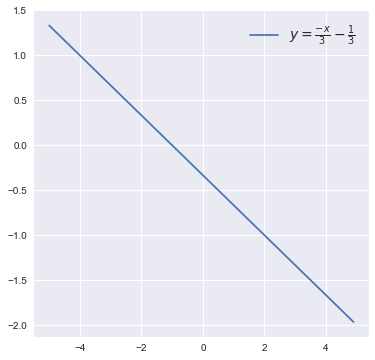

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x, y2)
ax.legend([r'$y = \frac{-x}{3} - \frac{1}{3}$'], fontsize=14, ncol=2)

Now, we can see our geometric representation of the equation's above-both straight lines. The fact that they are defined to be a system of equations means that they are both true at the same time (in our current state). Well, when do both equations have the same $x$ and $y$? When they _intersect_!

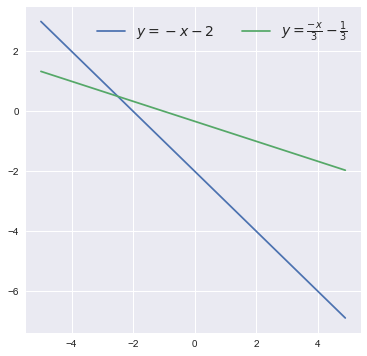

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x, y1)
plt.plot(x, y2)
ax.legend([r'$y = -x - 2$',r'$y = \frac{-x}{3} - \frac{1}{3}$'], fontsize=14, ncol=2)

We can see above that the intersection point-the point at which both equations have the same $x$ and $y$ values, and hence they are both true-is $x=-2.5$ and $y=0.5$. We can solve it by performing some simple algebraic manipulation, but for now what we really need is to just focus on the underlying geometry.

## 2.2 Linear Algebra View Point
Alright, we have just looked at what a system of equations represents from the perspective of geometric coordinate space. Now, there is an alternative view that is rather power. Let's try and view this system of equations through the lense of linear algebra. 

To begin, we can look at our system of equations again (the 3 dimensional case):

$$2x + 5y + 3z = -3$$<br>
$$4x + 0y + 8z = 0$$<br>
$$1x + 3y + 0z = 2$$<br>

Recall, we did not _need_ to align the system this way; we chose to. The $x$, $y$, and $z$ vertically inline, with the constant on the right, was a choice on our part. Once that choice was made, however, we can see a few things that are rather interesting.

> 1. The left hand side of each equation is a _**linear combination**_ of the variables $x$, $y$, and $z$. 
2. We know that vectors can often be expressed as _linear combinations_ of basis vectors. 
3. It almost looks as though our left hand side could be expressed via matrix vector multiplication-and it can! 

We can express the left hand side of equation as matrix vector multiplication!

$$
\begin{bmatrix}
    2 & 5 & 3 \\
    4 & 0 & 8 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} 
$$

To be clear about how we arrived here, let's actually work from this matrix represntation back to our coordinate space system of equations:

$$
\begin{bmatrix}
    2 & 5 & 3 \\
    4 & 0 & 8 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} \longleftrightarrow A \vec{x} = \vec{v}
$$
$$\downarrow$$<br>
$$
\begin{bmatrix}
    2 \\
    4 \\
    1 
\end{bmatrix} \cdot x + 
\begin{bmatrix}
    5 \\
    0 \\
    3 
\end{bmatrix} \cdot y +
\begin{bmatrix}
    3 \\
    8 \\
    0 
\end{bmatrix} \cdot z =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} 
$$
$$\downarrow$$<br>
$$
\begin{bmatrix}
    2x \\
    4x \\
    1x 
\end{bmatrix} + 
\begin{bmatrix}
    5y \\
    0y \\
    3y 
\end{bmatrix} +
\begin{bmatrix}
    3z \\
    8z \\
    0z 
\end{bmatrix} =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} 
$$
$$\downarrow$$<br>

$$
\begin{bmatrix}
    2x + 5y + 3z = -3 \\
    4x + 0y + 8z = 0 \\
    1x + 3y + 0z = 2
\end{bmatrix}
$$

We have just shown how these two representations-one in coordinate and one in vector space-are equivalent. From the linear algebra matrix-vector multiplication side of things, we can interpret it as follows:
> What vector $\begin{bmatrix}x \\y \\z\end{bmatrix}$ can be linearly transformed via the matrix: $\begin{bmatrix}2 & 5 & 3 \\4 & 0 & 8 \\1 & 3 & 0 \end{bmatrix}$ and result in the output vector: $\begin{bmatrix}-3 \\0 \\2\end{bmatrix}$? 

Now, the above is a vector space interpretation of our problem! It may feel a little strange at first, because it is living in a different space than our coordinate interpretation. 

### 2.2.1 Intuition
This next bit of intuition is seldom taught in courses, but I think you will find it rather useful. Even though we have proven above how we can switch back and forth between a geometric coordinate space (the system of equations) and a vector space (the matrix and vector), the question remains _how are they connected_? In other words:

> Why does solving a linear system of equations by methods of substitution end up being equivalent to finding the pre-transformation vector $\vec{x}$ in the equation $A\vec{x} = \vec{v}$? In other words, finding the vector $\vec{x}$ in the original vector space, that after being transformed via $A$, results in the vector $\vec{v}$

We can state this one more way, just to make sure we have run the gamut of ways to express this situation:

> Why does solving a linear system of equations by methods of substitution end up being equivalent to finding a linear combination of the _column vectors of $A$_ that give $\vec{v}$?

To fully understand this, we will approach the problem from two different angles; the theoretical angle and experimental angle. 

### 2.2.1.1 Intuition Theoretical
Let's look at our linear system of equations and matrix interpretation again:

$$
\begin{bmatrix}
    2 & 5 & 3 \\
    4 & 0 & 8 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} \hspace{1cm} \longleftrightarrow \hspace{1cm}
\begin{bmatrix}
    2x + 5y + 3z = -3 \\
    4x + 0y + 8z = 0 \\
    1x + 3y + 0z = 2
\end{bmatrix}
$$<br>

We have proven how we can shift back and forth between the vector space (left) and coordinate space (right). If we let (in the right hand side of our equation) the linear transformation matrix be $A$, the vector that is being transformed be $\vec{x}$, and the output/transformed vector be $\vec{v}$, then we can rewrite this as:

$$A \vec{x} = \vec{v}$$<br>

What this is saying, is that $A$ will _transform_ $\vec{x}$ in such a way, that it lands on $\vec{v}$. From a functional notation perspective we would see that:

$$\vec{x} \rightarrow A(\vec{x}) \rightarrow \vec{v}$$<br>
$$\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} \rightarrow A(\vec{x}) \rightarrow \begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix}$$

Which allows us to clearly see that, each coordinate of our original three dimensional vectors moves as follows:

$$\begin{bmatrix}
    x \rightarrow -3 \\
    y \rightarrow 0\\
    z \rightarrow 2
\end{bmatrix}$$<br>

This brings up the _first hurdle_ that you may encounter when going through this (as I did). All seems fine and well at this point, the mechanical manipulation of the numbers is no problem, until you realize: _the order of the equations was arbitrary_. That gave me pause when first learning this. If the order of the equations is arbitrary, and we could have just as easily have grouped them as follows when we started: 

$$
\begin{bmatrix}
    4x + 0y + 8z = 0 \\
    2x + 5y + 3z = -3 \\
    1x + 3y + 0z = 2
\end{bmatrix}
$$<br>

Then wouldn't that correspond to a _different matrix $A$_, and a _**different linear transformation**_? The answer is that _it would_! In this case, our transformation matrix would look like:

$$ A =
\begin{bmatrix}
    4 & 0 & 8 \\
    2 & 5 & 3 \\
    1 & 3 & 0 
\end{bmatrix}
$$<br>

But wait! All is not lost. The order of the output vector $\vec{v}$ would of course change as well (because it of course would have had to when reordering our equations):

$$
\begin{bmatrix}
    4 & 0 & 8 \\
    2 & 5 & 3 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    0 \\
    -3 \\
    2
\end{bmatrix}
$$<br>

Now we arrive at the _second hurdle_ that I encountered, and you may as well. The order of our vector $\vec{x}$ _does not change_. In other words, in our new ordering of the equations, we now have a transformation $A$ that takes $\vec{x}$ and moves it as follows:

$$\begin{bmatrix}
    x \rightarrow 0 \\
    y \rightarrow -3 \\
    z \rightarrow 2
\end{bmatrix}$$<br>

What we are seeing is that _the ordering does not matter_! Yes our transformation matrix $A$ has changed, but the output vector $\vec{v}$ has changed also! This _new_ transformation will take our original $\vec{x}$ and move it to the _new_ $\vec{v}$. This means that we can still solve for our $\vec{x}$ without a problem! 

### 2.2.1.2 Intuition Theoretical - Key Point
Alright, I must confess that at this point I still had several gaps in my intuition surrounding this. I still was struggling to understand how one equation (of the 3 that make up the system):

$$2x + 5y + 3z = -3$$<br>

Can relate to a _row_ from the matrix-vector representation. Now, this next bit of intuition will require a very solid understanding of linear transformation (I have another notebook on it-check it out). We can actually represent this equation as our original vector $\vec{x}$, transformed by a 1x3 matrix, into a 1-dimensional output:

$$
\begin{bmatrix}
    2 & 5 & 3 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    -3 
\end{bmatrix}
$$

This leads to a _very_ crucial point: 

> _**Each equation is a linear combination that yields one value.**_

Here, in coordinate space, the equation is a linear combination that will yield a single output. When we view it in vector space, we see that $\vec{x}$ is transformed from 3 dimensional space, to a single dimension (via the _dot product_). Stated again so we recognize how important this is:

> When we look at only _one_ row from the transformation matrix, we can view that as transforming $\vec{x}$ into 1 dimension! 

This has essentially allowed us to the find the transformed version of _one of the basis vectors_ (either $\hat{i}, \hat{j}$ or $\hat{k}$). 

**Most Crucial Point**<br>
And here is the best part of all! Because we don't simply have 1 equation, we have a _system_ of them, we are able to solve for the transformed versions of the remaining basis vectors as well! You may think: what transformed basis vector does the above 1 dimensional output represent? Well, it doesn't technically map to _any_ when performed on its own; it takes on its meaning once treated within the system. This corresponds nicely to the geometric approach where a single equation with 3 unknowns cannot be solved on its own. Only in _conjunction_ with 2 other equations can all 3 variables be solved for (since they place _constraints_ on state that we are in). 

As we saw earlier, we can change the order of the equations, which yields a different transformation matrix and output vector, however, the input vector remains the same! This is analogous to saying that we have a simple equation such as:

$$5 = x + 3$$

And then updating that to be:

$$8 = x + 6$$

We have changed the way in which we update the side with the variable (adding 3 and then adding 6), but our left hand side _is also updated_ to reflect this! The same thing is happening when we change the order of our equations, and subsequently get a different matrix. The operation (transformation) of our vector is altered, but the output is altered to match the alterered operation, keeping things in sync. 

A way to think about it is that we are _just trying to find linear combinations in **either space**_! 

### 2.2.1.1 Intuition Experimental

We are again will deal with the same system of equations that we looked at in the geometric coordinate space. 

$$2x + 2y = -4$$<br>
$$1x + 3y = -1$$<br>

$$
\begin{bmatrix}
    2  & 2\\
    1  & 3
\end{bmatrix}
\begin{bmatrix}
    x \\
    y 
\end{bmatrix} = 
\begin{bmatrix}
    -4 \\
    -1
\end{bmatrix}$$<br>
$$A \vec{x} = \vec{v}$$<br>

Now, we can get a look at our system from a unique perspective by overlaying our linear algebra view point, with the geometric coordinate space viewpoint:

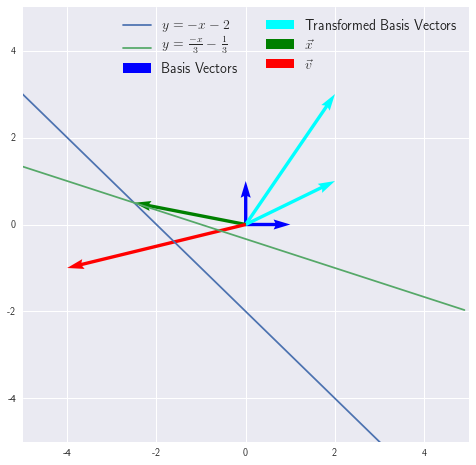

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
plt.rc('text', usetex=True)
# Basis vectors (i and j)
ax.quiver([0], [0], [1, 0], [0, 1], angles='xy', scale_units='xy', scale=1, color=['b'])

# Linearly transformed i and j
ax.quiver([0], [0], [2, 2], [1, 3], angles='xy', scale_units='xy', scale=1, color=['cyan'])


# x, pre transformation
ax.quiver([0], [0], [-2.5], [0.5], angles='xy', scale_units='xy', scale=1, color=['g'])

# v, (x post transformation)
ax.quiver([0], [0], [ -4], [-1], angles='xy', scale_units='xy', scale=1, color=['r'])

plt.plot(x, y1)
plt.plot(x, y2)
ax.legend([r'$y = -x - 2$',r'$y = \frac{-x}{3} - \frac{1}{3}$', 
           'Basis Vectors', 'Transformed Basis Vectors', 
           r'$\vec{x}$', r'$\vec{v}$', 'hi'], fontsize=14, ncol=2)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

It is clear that the original location of vector $\vec{x}$ has the exact same value as that of the intersection point of our two original equations! We can see where our original basis vectors are located, and where they lie after the linear transformation is applied. 

The only thing that seems to be left on it its own is our vector $\vec{v}$. We know that after we have performed the linear transformation $A$ that our vector $\vec{x}$ will land on $\vec{v}$. Keep in mind this alone is a pretty cool thing to realize. Consider looking at the original equations: 

$$2x + 2y = -4$$<br>
$$1x + 3y = -1$$<br>

You may wonder to yourself: "What exactly do the -4 and -1 represent?". You may realize that in one equation we are saying:

> Scaling $x$ by 2 and adding it $y$ scaled by 2 will _always_ yield -4. This is, remember, by definition a linear combination. 

What is interesting though, however, is that the -4 in this equation doesn't show up in our geometric coordinate space. This begins to touch on something rooted very deeply in our understanding of math, that we will confront in the next section. For now, we can conclude that -4 and -1 don't show up in the plot, and they aren't part of either functions curve. What is very interesting is that they instead have a direct representation in our linear transformation! They represent the resulting vector that our intersection vector (-2.5, 0.5) ends up at after it has been transformed via the matrix A. 

With that said, we can go one step further to get a visual understanding of of how $\vec{v}$ fits in here. We can solve for the _inverse_ matrix, $A^{-1}$, and determine the equations associated with it. We can then plot those equations, and they should intersect at the tip of $\vec{v}$!

In [6]:
import numpy as np
A = np.array([[2, 2], [1, 3]])
b = np.array([-4, -1])

print('A: \n', A)

Ainv = np.linalg.inv(A)
print('A inverse: \n', Ainv)

A: 
 [[2 2]
 [1 3]]
A inverse: 
 [[ 0.75 -0.5 ]
 [-0.25  0.5 ]]


Hence, our equations associated with the $A^{-1}$ are:

$$.75*x - 0.5*y = -2.5$$<br>
$$-0.25*x + 0.5*y = 0.5$$<br>

Remember, $A^{-1}$ represents the transformation that will take $\vec{v}$ to the location of $\vec{x}$! So, we can write:

$$A^{-1}\vec{v} = \vec{x}$$<br>

And that can be shown here:

In [7]:
Ainv.dot(b)

array([-2.5,  0.5])

And we can also add those two updated linear equations associated with our inverse transformation to our original plot! 

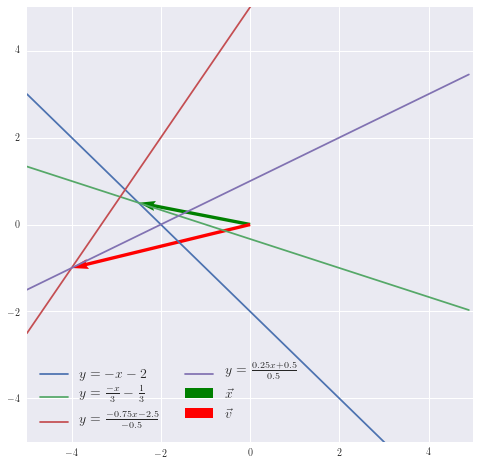

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
plt.rc('text', usetex=True)

# x, pre transformation
ax.quiver([0], [0], [-2.5], [0.5], angles='xy', scale_units='xy', scale=1, color=['g'])

# v, (x post transformation)
ax.quiver([0], [0], [ -4], [-1], angles='xy', scale_units='xy', scale=1, color=['r'])

plt.plot(x, y1)
plt.plot(x, y2)
ya = (-0.75*x - 2.5) / -0.5
yb = (0.25*x + 0.5)/0.5
plt.plot(x, ya)
plt.plot(x, yb)
ax.legend([r'$y = -x - 2$',r'$y = \frac{-x}{3} - \frac{1}{3}$', 
           r'$y = \frac{-0.75x - 2.5}{-0.5}$',r'$y = \frac{0.25x + 0.5}{0.5}$', 
           r'$\vec{x}$', r'$\vec{v}$', 'hi'], fontsize=14, ncol=2)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

Awesome! We can see that the lines associated intersect at the location of $\vec{v}$!

## 2.2.2 One equation vs. One row in transformation matrix 
At this point hopefully a great deal of ambiguity has been resolved between linear system's of equations and the linear transformation counterpart. However, there may still be a tingling of confusion surrounding the following:

> It is very clear what _a single_ equation from the system represents: a _line_. But what does a single _row_ and corresponding 1-d output vector represent? 

This is worth digging into further! Let's say we are in a scenario where we want to know what $x$ and $y$ are, for a given state of our world. We intially have _no idea_ what they are. However, we first learn that given our current state, a certain _relationship_ holds true (a function concerning both x and y). This alone will give us a line in the coordinate space:

$$2x + 5y = -3$$

Where above our equation is a linear combination of $x$ and $y$. Well, just as we realized that the above _function_ holds true given the state of our world, we could equally say that a certain _linear transformation_ holds given the state of our world:

$$
\begin{bmatrix}
    2 & 5 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
\end{bmatrix} =
\begin{bmatrix}
    -3 
\end{bmatrix}
$$

Where the transformation is of a 2-dimensional vector into 1-dimensional vector, _but_ we are not sure what the original vector values-it could be many! For instance, for the above transformation we could have $x = 1$ and $y = -1$. Or, $x = 6$ and $y = -3$. The list goes on and on. Visually, our transformation takes the visual form:

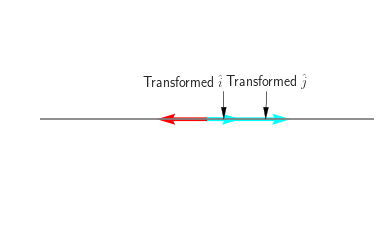

In [9]:
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)


# draw lines
xmin = -10
xmax = 10
y = 0
height = 1

plt.hlines(y, xmin, xmax, color='grey')

ax.quiver([0], [0], [2, 5], [0, 0], angles='xy', 
          scale_units='xy', scale=1, color='cyan', width=0.011)

ax.quiver([0], [0], [-3], [0], angles='xy', 
          scale_units='xy', scale=1, color='red', width=0.011)


plt.annotate(r'Transformed $\hat{i}$', (1,0), xytext = (1, 3), 
              arrowprops=dict(facecolor='black', width=0.01, headwidth=5), 
              horizontalalignment='right', fontsize=14)

plt.annotate(r'Transformed $\hat{j}$', (3.5,0), xytext = (6, 3), 
              arrowprops=dict(facecolor='black', width=0.01, headwidth=5), 
              horizontalalignment='right', fontsize=14)



plt.axis('off')
plt.show()

We _do not know_ which values of x and y correspond to our particular state yet. 

Now, suddenly there is a break in the case! We are given _another_ relationship concerning $x$ and $y$ that holds true for our current state of the world. We have been given another _constraint_. Now, from a coordinate space perspective, we have been given another line. From the vector space, it is another transformation that is holding true in our current state. At this point, we have 2 linear combinations. Because we know that they _both currently are true_, we treat them as a system. This means that we can hold them in a 2x2 matrix and treat it as one whole transformation (instead of 2 separate ones that resemble the dot product). 

---

# 2.3 Isomorphisms
Now, we have been tip toeing around a _very_ fundamental concept that occurs in throughout not only all of mathematics, but the world as we know it. That is the idea of an _**isomorphism**_. We are not going to dig into the strictly defined mathemematical isomorphism, but rather a slightly looser definition that carries incredible intuition.

> **Isomorphism**: The word _isomorphism_ applies when two complex structures can be mapped onto each other, in such a way that to each part of one structure there is a corresponding part in the other structure, where corresponding means that the two parts play similar roles in the respective structures.

This may still sound rather abstract, but let's go through a few quick examples to see how it can be applied to the relationship surrounding a linear system of equations and the corresponding linear transformation. 

### 2.3.1 Language
Imagine sitting down to breakfast, unfolding the paper, and having a nice cup of coffee. Your breakfast, coffee, and paper are all placed on top of _something_. That something is, in the english language, referred to as a _table_. There is an inherent mapping between the word _table_ and the corresponding _thing_ upon which your breakfast is resting atop. This mapping is so subtle to an english speaker they don't even recognize it. 

> $$\text{table} \longleftrightarrow \text{The thing your breakfast sits atop.}$$

However, let's not say for a moment that the english speaker asked a native spanish speaker to describe it; they come up with the word _mesa_. Ah, now for you as english speaker, it is a bit easier to identify that _mesa_ is meant to map to the thing your breakfast is sitting a top:

> $$\text{mesa} \longleftrightarrow \text{The thing your breakfast sits atop.}$$

If you didn't speak spanish, but were living in Spain and needed to purchase a _something that your breakfast could sit atop_, you could go to the department store and (perhaps not so smoothly) say _mesa_ and they would immediately understand that you were looking for a _table_, something that your breakfast can sit atop. 

> $$\text{table} \longleftrightarrow \text{mesa} \longleftrightarrow \text{The thing your breakfast sits atop.}$$

### 2.3.2 Symbols
Reading through the above example on language, you may start to see that certain _isomorphisms_ occur on a level that is so fundamental, they are hard to recognize. The implicit mapping between _table_ and  _something that your breakfast sits atop_ is so subtle, it often takes stepping outside of the system (in this case the english language), and utilizing another system (in this case the spanish language) to fully recognize it. 

This occurs just as frequently in mathematics. Take for example the symbol: 

> $$=$$

This symbol has an implicit mapping the concept "_is equal to_". It may seem crazy to think that there is a mapping between these two things, after all in most peoples mind's they are the _exact same thing_. However, it is important to realize the the equals symbol is manmade invention (invented by Robert Recorde, a Welsh Mathematician, in 1557). It is simply meant to map to the concept of equivalence. 

### 2.3.3 An Interesting System
For a moment let's consider that we never created _numbers_, or the symbols frequently used in mathematics (+, -, *, /, and so on) and instead decided to represent counts of things with the symbol:

> $$\text{-}$$

So, for instance, the following set of objects:

<img src="images/isomorphism1.png">

Could be represented as:

> $$\text{- - - -}$$

Where the above set of dash's is just mean to represent the number of green circles in our image. Now, lets say I tell you there are two additional symbols that we have access to (in addition to the `-` which represents a quantity:

> $$p \; e$$

If we were to write the following:

> $$\text{- - - - } p \text{ - - } e \text{ - - - - - -}$$

What do you think the symbols $p$ and $e$ are meant to map to? It seems perfectly natural that they map to _addition_ and _equals_. Perhaps even the symbol for _plus_, +, and the symbol for equals, =. Meaning that we can represent the above line in the more comfortable symbolic notation:

> $$\text{- - - - } + \text{ - - } = \text{ - - - - - -}$$

And this (bringing back in notation we are comfortable with), is literally saying "4 dashes plus 2 dashes equals 6 dashes"! But, what is helpful about this exercise is again looking at how there are different way to represent the _same thing_. In other words, there is an isomorphism, a mapping, between:

> $$- \leftrightarrow 1$$<br>
$$p \leftrightarrow +$$<br>
$$e \leftrightarrow =$$<br>

With that said, let's take a moment to be thankful that number's were created-doing mathematics with only dashes at our disposal would be incredibly tedious!

### 2.3.4 Descartes Big Leap
We are now prepared to talk about one of the most ground breaking isomorphisms that has ever been found. Say for a moment that I have the following equation:

> $$2x - y = 6$$

This is, at is core just a relationship about the current state of the world! For instance, if I told you that $x$ was representing the number of cookies you baked, and $y$ was representing the amount of money you made, then the relationship could be rewritten in english as:

> $$2*\text{Number of cookies baked} - \text{Amount of money you make} = 6$$

Now, up until the early 1600s, this was the extent to which the current state described above could be represented. A bit of a shame, considering humans are incredible _visual_ by nature. Then, along came French Mathematician Rene Descartes, who had a brilliant revelation. There was a _mapping_ that could be made between that relationship listed above, and a coordinate system! He found that by simply rearranging the relationship to be:

> $$\text{Amount of money you make} = 2*\text{Number of cookies baked} - 6$$

You could then create a coordinate system with a set of axis, and create a visual representation that encoded the _exact same information_ as the above equation:

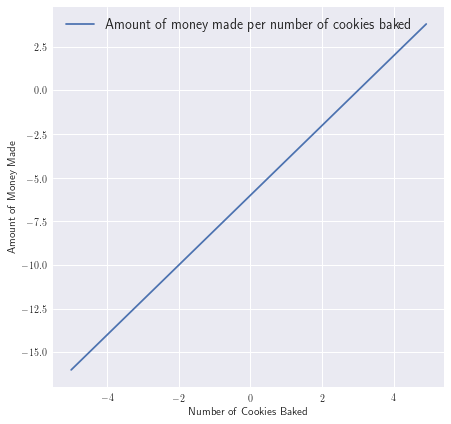

In [22]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.arange(-5, 5, 0.1)
y = 2*x - 6
plt.plot(x, y)

plt.xlabel('Number of Cookies Baked')
plt.ylabel('Amount of Money Made')
ax.legend(['Amount of money made per number of cookies baked'], fontsize=14, ncol=2)

This was an incredibly big leap! The ability to view these two different representations as equivalent allowed for massive advancements to be made in mathematics! 

### 2.3.5 Linear Systems of Equations vs. Linear Transformations
Now, we finally are at a point where we can tie everything that we just learned together. If we consider _Descartes_ big leap, we realize that he found _one_ way (a curve on a plane) of representing a relationship of the form:

$$2x - y = 6$$<br>

And the _main_ way in which students are taught to deal with relationships from grade school onwards is via the isomorphism that maps to relationship to the plane (via a curve/line). But, that is not the only way in which relationships can be viewed! 

Remember the language example; for an english speaker _something upon which my breakfast rests_ is mapped internally to _table_ without even thinking about it. It is so natural, that saying there is an isomorphism that exists almost feels wrong. However, if we now refer to _something upon which my breakfast rests_ as a _mesa_, it is immediately clear that there is a in fact a mapping. It is not as clear and intuitive, because the english speaker was not brought up with this association. 

The same thing occurs when looking at a relationship in mathematics. Students are brought up seeing an equation and the natural instinct is to use the isomorphism discovered by descartes and create the equal representation of a curve on a plane. To do this, one variable must be isolated as so:

$$y = 2x - 6$$<br>

But-and here is the main idea we have been getting at- in certain cases (such as our equation above), we can view this relationship not only as a curve on plane, but also as a _linear transformation_. In this case, we will perform some typographical operations, adding brackets, treating certain pieces of the equation as vectors and others as matrices, etc. We would end up with a representation of the following form:

$$
\begin{bmatrix}
    2 & -1 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
\end{bmatrix} =
\begin{bmatrix}
    -6
\end{bmatrix}
$$

The thing to keep in mind is that once we perform matrix-vector multiplication, we end up with a linear combination that is _identical_ in form and content to our original relationship $2x - y = 6$. So, summed up simply:

> The reason that we can use matrix-vector multiplication to solve a linear system of equations is because both the relationship represented by the equation and the relationship represnted by the matrix-vector multiplication yields an _identical linear combination_ when solved. This isomorphism that exists is incredibly powerful, and allows us to transfer a problem from one domain (coordinate space) to another (vector space). This gives us a new set of tools and techniques, and in many cases makes the problem more managable!

---

# Appendix
This appendix will show how to use numpy to solve the following system of linear equations:
$$2x + 2y = -4$$
<br>
$$1x + 3y = -1$$
<br>
$$
\begin{bmatrix}
    2  & 2\\
    1  & 3
\end{bmatrix}
\begin{bmatrix}
    x \\
    y 
\end{bmatrix} = 
\begin{bmatrix}
    -4 \\
    -1
\end{bmatrix}$$
<br>
$$A \vec{x} = \vec{v}$$


## A.1 Solve for $\vec{x}$

In [11]:
import numpy as np
A = np.array([[2, 2], [1, 3]])
v = np.array([-4, -1])

xvec = np.linalg.solve(A, v)
print(xvec)

[-2.5  0.5]


## A.2 Solve for $\vec{x}$, reverse order of rows in matrix $A$ and $\vec{v}$

In [12]:
Aflipped = np.array([[1, 3], [2, 2]])
v1 = np.array([-1, -4])

xvec1 = np.linalg.solve(Aflipped, v1)
print(xvec1)

[-2.5  0.5]
